# </a><center>Computer Infrastructure Assignments</center>
![divider](https://raw.githubusercontent.com/TindraIS/comp-infrastructure/main/img/divider.png)


**Table of contents**<a id='toc0_'></a>    
- [Execution notes (Task 8)](#toc1_)    
  - [T1](#toc1_1_)    
  - [T2](#toc1_2_)    
  - [T3](#toc1_3_)    
  - [T4](#toc1_4_)    
  - [T5](#toc1_5_)    
  - [T6](#toc1_6_)    
  - [T7](#toc1_7_)    
- [Athenry Weather Analysis (Task 9)](#toc2_)    
  - [Introduction](#toc2_1_)    
  - [Load Libraries & Dataset](#toc2_2_)    
  - [Data Examination](#toc2_3_)    
    - [> Overview](#toc2_3_1_)    
    - [> Duplicate Entries](#toc2_3_2_)    
    - [> Missing Values](#toc2_3_3_)    
  - [Data Wrangling](#toc2_4_)    
  - [Insights and Summarisation](#toc2_5_)    
    - [> Temperature Over Time](#toc2_5_1_)    
    - [> Wind Rose](#toc2_5_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---
## <a id='toc1_'></a>[Execution notes (Task 8)](#toc0_)

### <a id='toc1_1_'></a>[T1](#toc0_)

- Using Codespaces, I have navigated to **main** and with the `mkdir` command, created the directory _data_ and, after using `cd` command to navigate to the new directory, created the subdirectories _data/weather_ and _data/timestamps_.

- As Git does not include empty directories in commits, a _.gitkeep_ file was created in each directory using the `touch` command, [to ensure Git would recognise them](https://www.theserverside.com/blog/Coffee-Talk-Java-News-Stories-and-Opinions/gitkeep-push-empty-folders-git-commit).

- Also using the `touch` command the present file has been created.

- The new changes where then commited and pushed to GitHub using the below commands:
    - `git add .` to update the index 
    - `git commit -m` to [record changes](https://git-scm.com/docs/git-commit) to the repository with a log message describing the new contents.
    - `git push` to [upload the changes](https://git-scm.com/docs/git-push) to GitHub.

### <a id='toc1_2_'></a>[T2](#toc0_)

- Using Codespaces, I have navigated to the data/timestamps directory using the `cd` command in the terminal. 

- Created now.txt and appended the current date and time using the date >> now.tx command.

- Repeated the above command ten more times with a [_for loop_](https://www.tecmint.com/run-linux-command-multiple-times/): `for counter in {1..10}; do date >> now.txt; done`

- Used the `more` command to verify that now.txt had the [expected content](https://www.baeldung.com/linux/files-cat-more-less).

### <a id='toc1_3_'></a>[T3](#toc0_)

- Ran the `date` command with the [YYYmmdd_HHMMSS format](https://www.cyberciti.biz/faq/linux-unix-formatting-dates-for-display/): `date +"%Y%m%d_%H%M%S"`

- Appended the above output to a file named formatted.txt using the `>>` [operator](https://www.cyberciti.biz/faq/linux-append-text-to-end-of-file/)

- Verified the file content with the `cat` command: `cat formatted.txt`

### <a id='toc1_4_'></a>[T4](#toc0_)

- A new file was created using the `touch` and ` date` commands: **touch &#96;date +"%Y%m%d_%H%M%S.txt"&#96;**
As the date command is in backticks, [the output is stored in a variable](https://linuxopsys.com/bash-backticks-vs-dollar-parentheses) which means the backticks the second command's action depends upon the first one.

- Used the `ls -Artls | tail -1` command to [verify the file had been created and that the time stamp was correct](https://www.baeldung.com/linux/get-recent-file-in-directory).b

### <a id='toc1_5_'></a>[T5](#toc0_)

- Ensured we are in the correct directory with the `cd data/weather` command.

- Then used `wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today` to save the output in a file. This command is used to [download content from the world wide web (hence the command name)](https://www.geeksforgeeks.org/wget-command-in-linux-unix/) and its synthax supports several options. The -O option was used to specify the filename, as the default name is the last part of the URL.

- To confirm that the content of the saved file matches exactly the data fetched from Met Éireann's API endpoint, the following command was used: ` curl -s https://prodapi.metweb.ie/observations/athenry/today | diff - weather.json`. 
    - `curl` is used for transferring data from the URLs combined with -s option to switch off the progress meter output and only show the actual data retrieved.
    - The `|` takes the output from the curl command and feeds it as input into the diff command.
    - The `diff` command compares two outputs and shows the differences - if any. Using a dash (-) in place of a filename tells diff to read the data piped in from curl.

<sup>References: 
<br>[1] [Comparing Files and Folders in Linux using diff command](https://medium.com/itversity/comparing-files-and-folders-in-linux-using-diff-command-c2177fd80852) 
<br>[2] [Unix and Linux StackExchange](https://unix.stackexchange.com/questions/11733/how-to-diff-a-file-and-output-from-the-command)
<br>[3] [cURL man page](https://curl.se/docs/manpage.html)
<br>[4] [diff Command in Linux](https://phoenixnap.com/kb/linux-diff)
<br>[5] [ExplainShell](https://explainshell.com/explain/1/curl)
</sup>

### <a id='toc1_6_'></a>[T6](#toc0_)

- In order to save the downloaded file from task 5 with a timestamped name in the format YYYYmmdd_HHMMSS.json, the following command was used: **wget -O &#96;date +"%Y%m%d_%H%M%S.json"&#96; https://prodapi.metweb.ie/observations/athenry/today**

- The `ls` command was executed to list the files and retrieve the timestamped filename. The following command was then used to verify if the file contained valid JSON data with the `file="20241213_233614.json" && jq . "$file" > /dev/null && echo "$file is valid." || echo "$file is invalid."`:
    - `jq` allows to parse, filter, and transform JSON data and the `.` option takes the input and produces it unchanged as the output.
    - The `> /dev/null` command ensures the JSON file isn't displayed in the terminal.
    - The `&& echo "$file is valid." || echo "$file is invalid."`  construct displays one message or (||) the other in the terminal, depending on whther the JSON parsing by jq is successfull or not. Given it is not feasible to manually check the terminal for errors or printed JSON data when parsing files when automating workflows,  validity tests like this should be used to automate error detection and notify if something goes wrong.


<sup>References: 
<br>[1] [StackExchange](https://unix.stackexchange.com/questions/581240/what-is-the-use-of-script-2-dev-null-in-the-following-script#:~:text=So%2C%202%3E%20%2Fdev%2F,link%20CC%20BY%2DSA%204.0)
<br>[2] [jq Command JSON](https://www.baeldung.com/linux/jq-command-json)
<br>[3] [jq man page](https://linuxcommandlibrary.com/man/jq)
<br>[4] [What is /Dev/Null in Linux?](https://www.geeksforgeeks.org/what-is-dev-null-in-linux/)
</sup>

### <a id='toc1_7_'></a>[T7](#toc0_)

1. Executed the `nano` command to create a new file named weather.sh. If the file existed in the current directory, it would be opened for editing, however as it doesn’t [a new file is created](https://ioflood.com/blog/nano-linux-command/#:~:text=To%20use%20the%20nano%20command,will%20create%20it%20for%20you.).
1. Next, using [this article](https://ultahost.com/knowledge-base/create-bash-script/) as a guide, the file was edited with the below bash script:

```bash
# Shebang line that specifies the path to the interpreter that should be used to execute the script
#!/bin/bash

# Create variables for the output directory, log file, filename, path, and weather data URL
output_dir="data/weather"
log_file="weather.log" 
filename="$(date +%Y%m%d_%H%M%S).json"
output_file="$output_dir/$filename"
weather_url="https://prodapi.metweb.ie/observations/athenry/today"

# Function to send error notifications
send_error_email() {
    error_message="$1"
    python3 send_error_email.py "$error_message"
}

# Log the start of the download
echo -e "\n--------------------------------------------------------------" >> "$log_file"
echo "$(date) [INFO]: Fetching weather data from Met Eireann API endpoint" >> "$log_file"

# Fetch the weather data and save it with the timestamped filename
if wget -O "$output_file" "$weather_url" >> "$log_file" 2>&1; then
    echo "$(date) [INFO]: Successfully downloaded $filename" >> "$log_file"
else
    error_message="$(date) [ERROR]: Failed to download weather data from $weather_url. Check the URL or network connection."
    echo "$error_message" >> "$log_file"
    send_error_email "$error_message"
    exit 1
fi

# Validate the JSON data and remove the newly created file if data isn't valid
if jq . "$output_file" > /dev/null 2>&1; then
    echo "$(date) [INFO]: $filename is valid." >> "$log_file"
    echo "$filename is valid."
else
    error_message="$(date) [ERROR]: $filename is invalid. Removing file."
    echo "$error_message" >> "$log_file"
    rm -f "$output_file"
    send_error_email "$error_message"
    echo "$filename is invalid."
    exit 1
fi
``` 

3. The process from task 6 was slightly modified to include a log file and email notification whenever an error occurs.

    **3.1 Log file**
    
    The log file can be [useful for troubleshooting and debugging](https://www.squash.io/ensuring-bash-scripts-continue-after-error-in-linux/). By logging errors, details about the error can be captured, such as the command that failed, the error message, and any relevant context -- information that can then be used to diagnose and fix the issue. Additionally, [severity levels were included in each log](https://betterstack.com/community/guides/logging/log-levels-explained/) to categorise entries based on their impact or urgency.

    **3.2 Email notification**

    The [email notification](https://mailtrap.io/blog/python-send-html-email/) is contained within a function that runs the `send_error_email.py` program, which is triggered everytime an error occurs. This Python script uses the native`smtp` (Simple Mail Transfer Protocol) and `email` modules that when combined provide the fundamental foundation for sending HTML emails directly from Python. 

    Since sensitive data like SMTP credentials (email and app password) should not be uploaded to GitHub, the following steps were taken to securely manage these constants:

    - An App Password was created using my personal Google Account
    - SMTP credential, were added as GitHub Secrets to securely store and manage them. These secrets are accessed as environment variables during the GitHub Actions workflow. 
    
    _Note: I had initially created an `.env` file to store credentials, but have eliminated it to maintain compliance with security best practices._

    [The MIMEText (Multipurpose Internet Mail Extensions) class](https://docs.python.org/3/library/email.mime.html) has also been added so that HTML and CSS can be combined with plain text. Specifically, it is used to construct a MIME (Multipurpose Internet Mail Extensions) email message which ensures the email body is encoded as plain text and includes the necessary headers for proper delivery.
    
4. To make the Bash script executable, the `chmod +x` command followed by the script name was ran. This command is used to [change the permissions of files and directories in linux](https://www.howtogeek.com/437958/how-to-use-the-chmod-command-on-linux/). As for the +x , it makes the file executable for all users, enabling us ou to run it as a script.

1. As the final step, the script was ran using the command `./weather.sh`. The ./ notation tells the shell to execute the script in the current directory.

<sup>Other References: 
<br>[1] [How to Write a Bash Script: A Simple Bash Scripting Tutorial](https://www.datacamp.com/tutorial/how-to-write-bash-script-tutorial)
<br>[2] [A Step-by-Step Guide to Creating a Bash Script in Linux](https://nowitsanurag.medium.com/a-step-by-step-guide-to-creating-a-bash-script-in-linux-b2bc02e892d)
<br>[3] [How to Create a Bash Script: Step-by-Step Guide](https://ultahost.com/knowledge-base/create-bash-script/)
<br>[4] [StackOverflow](https://stackoverflow.com/questions/18460186/writing-outputs-to-log-file-and-console)
<br>[5] [Log Monitoring and Analysis using Bash Script: Step-By-Step Guide
](https://medium.com/@janmesh.js/log-monitoring-and-analysis-using-bash-script-step-by-step-guide-4d2a9ccb0bdf)
<br>[6] [Log Levels Explained](https://betterstack.com/community/guides/logging/log-levels-explained/)
<br>[7] [Sending Emails with Python Using the ‘smtplib’ Library](https://medium.com/@thakuravnish2313/sending-emails-with-python-using-the-smtplib-library-e5db3a8ce69a)
</sup>

---
## <a id='toc2_'></a>[Athenry Weather Analysis (Task 9)](#toc0_)

### <a id='toc2_1_'></a>[Introduction](#toc0_)

This notebook examines and summarises a dataset with [Athenry's weather stats for December 13th, 2024](https://data.gov.ie/dataset/todays-weather-athenry). Updated hourly, it includes local time values and records from Met Éireann's synoptic station in Athenry, Co Galway for the following parameters for each hour:

- **Temperature (°C):** 
The ambient air temperature measured in degrees Celsius, excluding the effects of direct sunlight or other external heat sources.

- **Weather Symbol Code:**
Codes that map to [OpenWeather's symbols](https://openweathermap.org/weather-conditions), which provide a visual representation of the weather.

- **Weather Description:**
A textual description of the prevailing weather conditions.

- **Wind Speed (kn):**
The average speed of wind measured in knots ([1 knot = 1.852 km/h](https://www.meteoswiss.admin.ch/dam/jcr:c1064242-4a6e-4df2-8d21-96e68d1def7a/Beaufort_Tabelle_en.pdf)).

- **Cardinal Wind Direction:**
The compass direction from which the wind originates, represented in cardinal points.

- **Wind Direction (°):**
The wind direction in degrees, [measured clockwise from true north/0°](https://www.windcrane.com/blog/windcrane-general/how-measure-wind-direction#:~:text=Degrees%3A%20Alternatively%2C%20the%20wind%20can,is%20equivalent%20to%20the%20west.).

- **Humidity (%):**
The amount of moisture in the air expressed as a percentage of the maximum amount the air can hold at the given temperature.

- **Rainfall (mm):**
The amount of precipitation recorded during the observation period, measured in millimeters.

- **Mean Sea Level Pressure (mbar):**
The atmospheric pressure reduced to sea level, measured in millibars, used to assess large-scale weather patterns.

### <a id='toc2_2_'></a>[Load Libraries & Dataset](#toc0_)

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns
from windrose import WindroseAxes
import re

%load_ext autoreload 
%autoreload

In [2]:
# Set the path to the weather data directory & list the files in the directory
weather_dir = "data\weather"
weather_files = [os.path.join(weather_dir, f) for f in os.listdir(weather_dir)]

# Get the largest file in the directory
# https://www.turing.com/kb/how-to-get-the-size-of-file-in-python#making-use-of-os.path-module%E2%80%99s-getsize-function
# https://docs.python.org/3/library/functions.html#max
json_file = max(weather_files, key=os.path.getsize)
print("Largest file:", json_file)

# Load the JSON data into a pandas DataFrame
df = pd.read_json(json_file)

Largest file: data\weather\20241213_233614.json


### <a id='toc2_3_'></a>[Data Examination](#toc0_)

In this section, we will:
1. Display the first few rows of the dataset to understand its structure.
2. Check for missing values and the data types of each column.
3. Summarize numerical columns using descriptive statistics.
4. Check for unique values in categorical columns (if any).
5. Identify potential outliers in key metrics like temperature, wind speed, and rainfall.
6. Explore trends, distributions, and relationships between variables.

#### <a id='toc2_3_1_'></a>[> Overview](#toc0_)

In [3]:
print("First few rows of the data:")
df.head(24)

First few rows of the data:


,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,3,15n,Fog / Mist,"""Mist""",9,-,E,90,92,0.00,1030,Friday,2024-12-13,00:00
1,Athenry,3,15n,Fog / Mist,"""Mist""",6,-,E,90,92,0.00,1029,Friday,2024-12-13,01:00
2,Athenry,4,15n,Fog / Mist,"""Mist""",6,-,E,90,91,0.00,1029,Friday,2024-12-13,02:00
3,Athenry,4,15n,Fog / Mist,"""Mist""",7,-,E,90,89,0.00,1029,Friday,2024-12-13,03:00
4,Athenry,4,04n,Cloudy,"""Cloudy""",4,-,E,90,91,0.00,1029,Friday,2024-12-13,04:00
5,Athenry,4,04n,Cloudy,"""Cloudy""",7,-,E,90,90,0.00,1028,Friday,2024-12-13,05:00
6,Athenry,4,04n,Cloudy,"""Cloudy""",4,-,E,90,90,0.00,1028,Friday,2024-12-13,06:00
7,Athenry,4,04n,Cloudy,"""Cloudy""",7,-,E,90,90,0.00,1028,Friday,2024-12-13,07:00
8,Athenry,4,04n,Cloudy,"""Cloudy""",4,-,NE,45,91,0.00,1028,Friday,2024-12-13,08:00
9,Athenry,4,04d,Cloudy,"""Cloudy""",4,-,W,270,92,0.00,1029,Friday,2024-12-13,09:00


In [4]:
print("\nSummary of the data:")
df.info()


Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   24 non-null     object        
 1   temperature            24 non-null     int64         
 2   symbol                 24 non-null     object        
 3   weatherDescription     24 non-null     object        
 4   text                   24 non-null     object        
 5   windSpeed              24 non-null     int64         
 6   windGust               24 non-null     object        
 7   cardinalWindDirection  24 non-null     object        
 8   windDirection          24 non-null     int64         
 9   humidity               24 non-null     int64         
 10  rainfall               24 non-null     float64       
 11  pressure               24 non-null     int64         
 12  dayName                24 non-null     objec

In [5]:
print("\nDescriptive stats:")
# By default, describe() includes only numeric columns, so the param include 
# should be specified for variables of object data type
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe
df.describe(include='all')


Descriptive stats:


,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
count,24,24.000000,24,24,24,24.000000,24,24,24.000000,24.000000,24.000000,24.000000,24,24,24
unique,1,NaN,7,5,6,NaN,1,7,NaN,NaN,NaN,NaN,1,NaN,24
top,Athenry,NaN,15n,Cloudy,"""Cloudy""",NaN,-,E,NaN,NaN,NaN,NaN,Friday,NaN,00:00
freq,24,NaN,7,12,12,NaN,24,8,NaN,NaN,NaN,NaN,24,NaN,1
mean,NaN,4.500000,NaN,NaN,NaN,5.666667,NaN,NaN,178.125000,91.791667,0.021250,1027.875000,NaN,2024-12-13 00:00:00,NaN
min,NaN,2.000000,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,87.000000,0.000000,1026.000000,NaN,2024-12-13 00:00:00,NaN
25%,NaN,4.000000,NaN,NaN,NaN,4.000000,NaN,NaN,90.000000,90.000000,0.000000,1027.000000,NaN,2024-12-13 00:00:00,NaN
50%,NaN,4.000000,NaN,NaN,NaN,6.000000,NaN,NaN,202.500000,91.500000,0.000000,1028.000000,NaN,2024-12-13 00:00:00,NaN
75%,NaN,6.000000,NaN,NaN,NaN,7.000000,NaN,NaN,270.000000,93.000000,0.000000,1029.000000,NaN,2024-12-13 00:00:00,NaN
max,NaN,6.000000,NaN,NaN,NaN,11.000000,NaN,NaN,315.000000,99.000000,0.400000,1030.000000,NaN,2024-12-13 00:00:00,NaN


In [6]:
print("\nUnique Values in Each Column:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


Unique Values in Each Column:
name: ['Athenry']
symbol: ['15n' '04n' '04d' '15d' '05n' '46n' '02n']
weatherDescription: ['Fog / Mist' 'Cloudy' 'Rain showers' 'Light rain ' 'Fair']
text: ['"Mist"' '"Cloudy"' '"Rain shower"' '"Recent Drizzle "' '"Recent Fog"'
 '"Fair"']
windGust: ['-']
cardinalWindDirection: ['E' 'NE' 'W' 'N' 'S' 'SW' 'NW']
dayName: ['Friday']
reportTime: ['00:00' '01:00' '02:00' '03:00' '04:00' '05:00' '06:00' '07:00' '08:00'
 '09:00' '10:00' '11:00' '12:00' '13:00' '14:00' '15:00' '16:00' '17:00'
 '18:00' '19:00' '20:00' '21:00' '22:00' '23:00']


#### <a id='toc2_3_2_'></a>[> Duplicate Entries](#toc0_)

In [7]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


#### <a id='toc2_3_3_'></a>[> Missing Values](#toc0_)

By looking at the missing values count with pandas' `isna().` it seems the data does not have any gaps.

In [8]:
print("\nMissing values:")
df.isna().sum()


Missing values:


name                     0
temperature              0
symbol                   0
weatherDescription       0
text                     0
windSpeed                0
windGust                 0
cardinalWindDirection    0
windDirection            0
humidity                 0
rainfall                 0
pressure                 0
dayName                  0
date                     0
reportTime               0
dtype: int64

However, apart from standard missing values that Pandas can detect (such as NaN), data might also be missing in various other formats, including "N/A", "na", "-", or represented as 0. According to the article [Data Cleaning with Python and Pandas: Detecting Missing Values](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b), these formatting inconsistencies can be detected by using the following logic:

- If the column is *categorical* and the value **is converted**, it suggests formatting inconsistencies. In such cases, replace the value is replaced with Numpy's `np.nan` as [_a poor man's mask_](https://numpy.org/doc/stable/user/misc.html), and increment the counter by 1. Otherwise, no action is taken.
- If the column is *numerical* and the value **is not converted**, it indicates the presence of string values, so these are replaced as NaN and the counter is incremented by 1. If conversion is successful, we take no action.


In [9]:
''' ------- Function to detect integers in categorical columns ------- '''
def detect_nan_categorical_columns(df, column):
    # Start counter of null values to be used in the below loop
    count_nulls = 0
    special_char_count = 0


    # Loop through each row in the DataFrame
    for index, row in df.iterrows():
        try:
            int(row[column])    # Try to convert the value to an integer
            df.loc[index, column] = np.nan # If the value is converted, enter a missing value with Numpy and Pandas loc https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
            count_nulls += 1 # Increment the null count after the conversion 
        
        except ValueError: # Otherwise, we know the value is a string, so we caught the error and use a pass statement to avoid getting an exception
            
            # If it's not an integer, check for special characters using regex
            if re.fullmatch(r'[^a-zA-Z0-9\s]+', str(row[column])):
                df.loc[index, column] = np.nan  # Replace with NaN for special characters
                special_char_count += 1

    # Return the count of values converted to NaN
    return count_nulls,special_char_count


''' ------- Function to detect text in numerical columns ------- '''
def detect_nan_numerical_columns(df, column):
    # Start counter of null values to be used in the below loop
    count_nulls = 0

    # Loop through each row in the DataFrame
    for index, row in df.iterrows():
        try:
            int(row[column]) # Try to convert the value to an integer
            pass # If the value is converted, do nothing as we know there aren't format inconsistencies

        except ValueError: # Otherwise, we know the value is a string, so we caught the error and:
            df.loc[index, column] = np.nan  # enter a missing value with Numpy
            count_nulls += 1                # increment the null count if the value is converted

    # Return the count of values converted to NaN
    return count_nulls

# Identify text and numerical columns
string_cols = [
    col for col in df.select_dtypes(include='object').columns
    if not pd.api.types.is_datetime64_any_dtype(df[col])
]
numerical_cols = df.select_dtypes(include='number').columns

# Apply detect_nan_categorical_columns to string columns
for col in string_cols:
    null_count = detect_nan_categorical_columns(df, col)
    print(f"Column '{col}': {null_count[1]} integers converted to NaN")

# Apply detect_nan_numerical_columns to numerical columns
for col in numerical_cols:
    null_count = detect_nan_numerical_columns(df, col)
    print(f"Column '{col}': {null_count} text values converted to NaN")


Column 'name': 0 integers converted to NaN
Column 'symbol': 0 integers converted to NaN
Column 'weatherDescription': 0 integers converted to NaN
Column 'text': 0 integers converted to NaN
Column 'windGust': 24 integers converted to NaN
Column 'cardinalWindDirection': 0 integers converted to NaN
Column 'dayName': 0 integers converted to NaN
Column 'reportTime': 0 integers converted to NaN
Column 'temperature': 0 text values converted to NaN
Column 'windSpeed': 0 text values converted to NaN
Column 'windDirection': 0 text values converted to NaN
Column 'humidity': 0 text values converted to NaN
Column 'rainfall': 0 text values converted to NaN
Column 'pressure': 0 text values converted to NaN


### <a id='toc2_4_'></a>[Data Wrangling](#toc0_)

In [10]:
# Create datetime col for creating plots
df['datetime'] = pd.to_datetime(df['reportTime'], format="%H:%M").dt.time
print(f"\nEntry type: {type(df['datetime'].iloc[0])}")
print(f"Missing values: {df['datetime'].isnull().sum()}")


Entry type: <class 'datetime.time'>
Missing values: 0


In [11]:
# Convert humidity to decimal percentages
df['humidity'] = df['humidity'] / 100

df['humidity'].head()

0    0.92
1    0.92
2    0.91
3    0.89
4    0.91
Name: humidity, dtype: float64

### <a id='toc2_5_'></a>[Insights and Summarisation](#toc0_)

In [12]:
# Set plots colour scheme and style
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": "--"})
sns.set_palette("coolwarm")

<sup>References:
<br> https://seaborn.pydata.org/generated/seaborn.set_style.html
<br> https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html
<br> https://seaborn.pydata.org/tutorial/color_palettes.html
</sup>

#### <a id='toc2_5_1_'></a>[> Temperature Over Time](#toc0_)

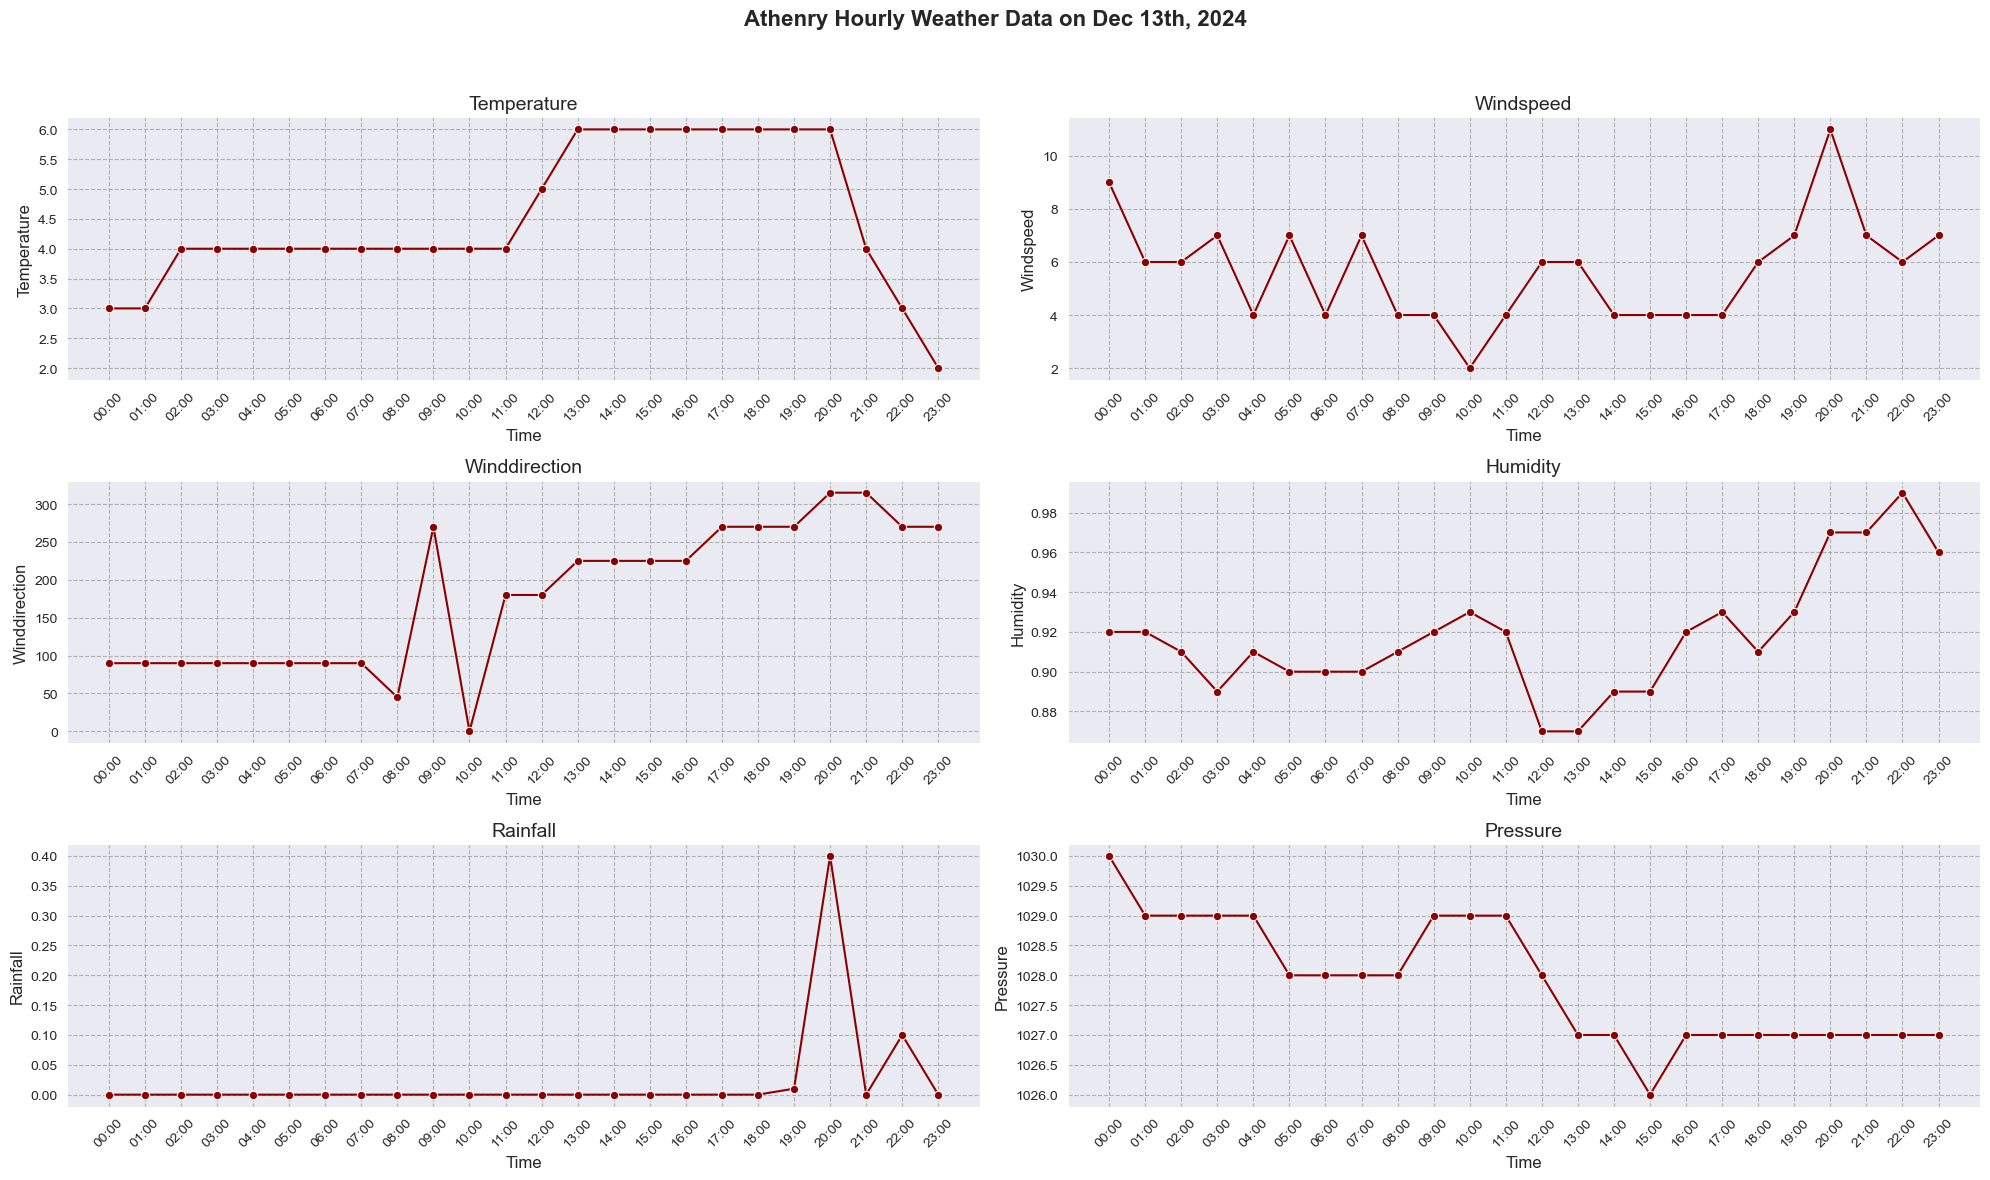

In [18]:
numerical_cols = df.select_dtypes(include='number').columns

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.suptitle("Athenry Hourly Weather Data on Dec 13th, 2024", fontsize=16, fontweight='bold')
axes = axes.flatten() if len(numerical_cols) > 1 else [axes]

# Plot each numerical variable in a separate subplot
for i, col in enumerate(numerical_cols):
    sns.lineplot(data=df, x="reportTime", y=col, marker="o", linestyle="-", color="darkred", ax=axes[i])
    axes[i].set_title(f"{col.capitalize()}", fontsize=14)
    axes[i].set_xlabel("Time", fontsize=12)
    axes[i].set_ylabel(col.capitalize(), fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].grid(True, linestyle="--", alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<sup>References:
<br> https://matplotlib.org/stable/users/explain/axes/axes_intro.html
<br> https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf
<br> https://matplotlib.org/stable/users/explain/axes/arranging_axes.html#arranging-axes
</sup>

#### <a id='toc2_5_2_'></a>[> Wind Rose](#toc0_)

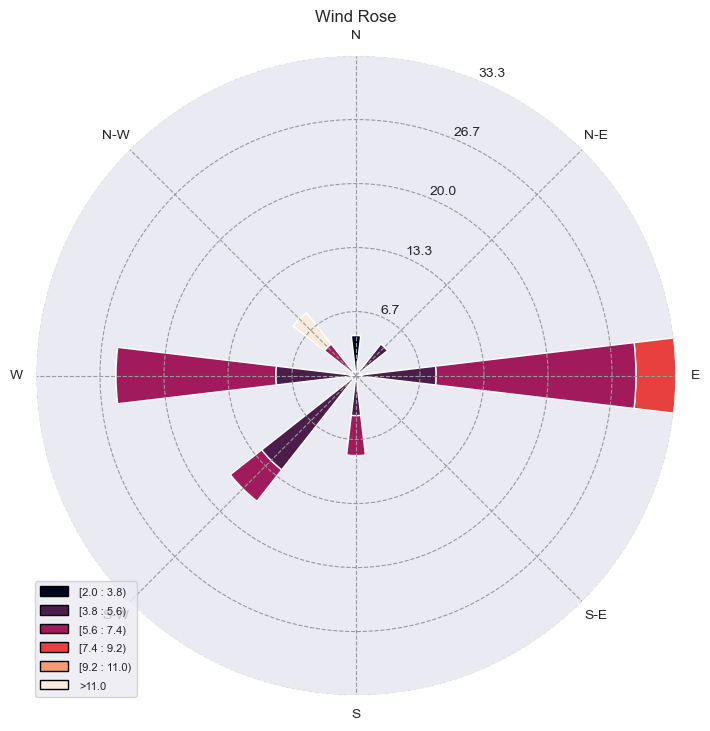

In [14]:
# Create wind rose plot
windrose = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=windrose)
ax.bar(df['windDirection'], df['windSpeed'], normed=True, opening=0.6, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose')
plt.show()

<sup> References:
<br>https://python-windrose.github.io/windrose/usage-output.html
<br>https://hatarilabs.com/ih-en/how-to-make-a-wind-rose-with-python-tutorial
<br>https://pypi.org/project/windrose/
</sup>

#### <a id='toc2_5_2_'></a>[> Correlation Matrix](#toc0_)

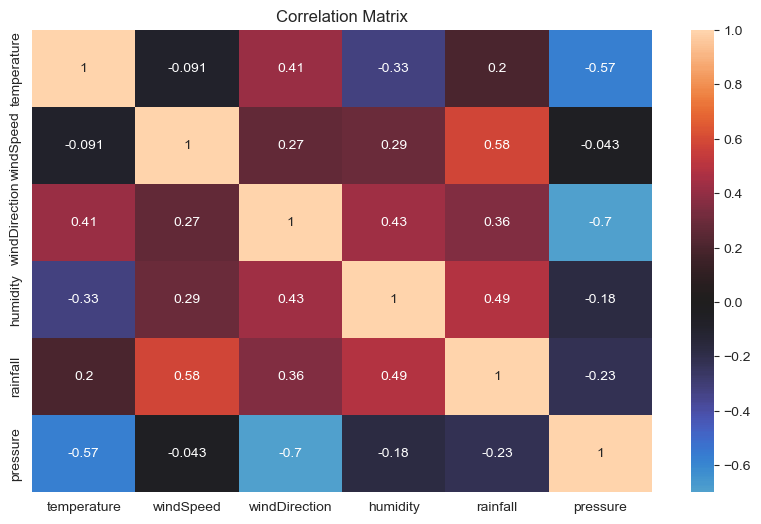

In [15]:
# Create correlation matrix
numerical_vars = df.select_dtypes(include='number')
corr = numerical_vars.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, center=0)
plt.title('Correlation Matrix')
plt.show()

---

### <a id='toc2_6_'></a>[End](#toc0_)